<a href="https://colab.research.google.com/github/dxt42250/Image-Classification-with-CNN/blob/main/Image_Classification_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 [==============================] - 13s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)       

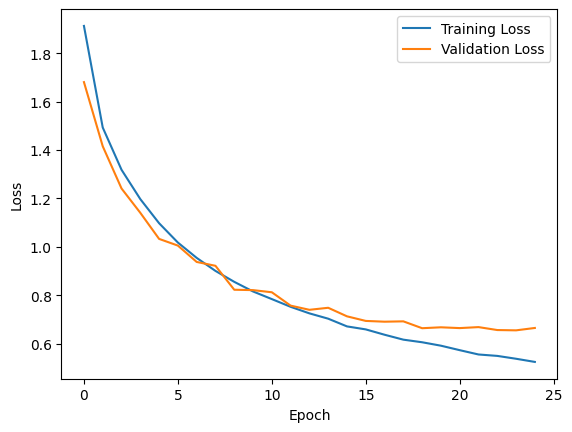

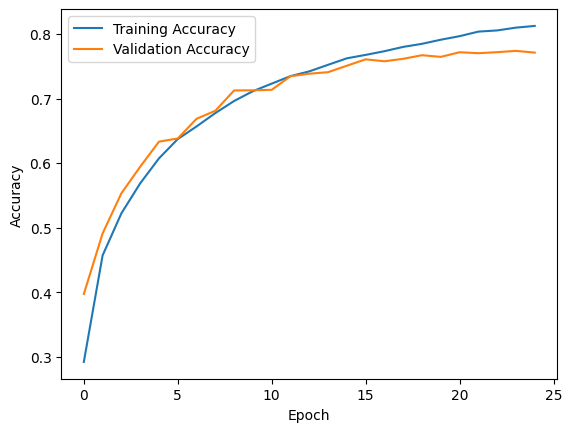

In [1]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.constraints import max_norm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
import matplotlib.pyplot as plt

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# Create the model
model = Sequential()

# Convolutional input layer, 32 feature maps with a size of 3×3 and a rectifier activation function
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=max_norm(3)))
# Dropout layer at 20%
model.add(Dropout(0.2))

# Convolutional layer, 32 feature maps with a size of 3×3 and a rectifier activation function
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=max_norm(3)))
# Max Pool layer with size 2×2
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout layer at 20%
model.add(Dropout(0.2))

# Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=max_norm(3)))
# Dropout layer at 20%
model.add(Dropout(0.2))

# Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=max_norm(3)))
# Max Pool layer with size 2×2
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout layer at 20%
model.add(Dropout(0.2))

# Convolutional layer, 128 feature maps with a size of 3×3 and a rectifier activation function
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=max_norm(3)))
# Dropout layer at 20%
model.add(Dropout(0.2))

# Convolutional layer, 128 feature maps with a size of 3×3 and a rectifier activation function
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=max_norm(3)))
# Max Pool layer with size 2×2
model.add(MaxPooling2D(pool_size=(2, 2)))
# Flatten layer
model.add(Flatten())
# Dropout layer at 20%
model.add(Dropout(0.2))

# Fully connected layer with 1024 units and a rectifier activation function
model.add(Dense(1024, activation='relu', kernel_constraint=max_norm(3)))
# Dropout layer at 20%
model.add(Dropout(0.2))

# Fully connected layer with 512 units and a rectifier activation function
model.add(Dense(512, activation='relu', kernel_constraint=max_norm(3)))
# Dropout layer at 20%
model.add(Dropout(0.2))

# Fully connected output layer with 10 units and a Softmax activation function
model.add(Dense(num_classes, activation='softmax'))

# Compile model
epochs = 25
learning_rate = 0.01
decay = learning_rate / epochs
sgd = SGD(learning_rate=learning_rate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))

# Predict the first 4 images in the test data
predictions = model.predict(X_test[:4])
predicted_labels = np.argmax(predictions, axis=1)

# Actual labels for the first 4 images
actual_labels = np.argmax(y_test[:4], axis=1)

print("Predicted Labels:", predicted_labels)
print("Actual Labels:", actual_labels)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
